## Datu apstrāde. 1 daļa ##

**Ievads**

Latvijā ir iespējams iegādāties dažādu zīmolu un atšķirīga sastāva dīzeļdegvielu.
Degvielas lietderīgumu nosaka tās saspiežamība, pilienu veidošanās īpašības, pašaizdegšanās un sadedzes parametri kā arī siltumspēja. Tāpat arī motora un braukšanas režīma parametriem var būt ietekme uz konkrētas degvielas izmantošanas lietderīgumu.
Pētījumā iegūti degvielas tilpuma patēriņa dati vairākiem atšķirīgiem degvielas paraugiem. Izmēģinājumi veikti laboratorijā, imitējot braucienu uz jaudas stenda, kas parādīts 1. att.

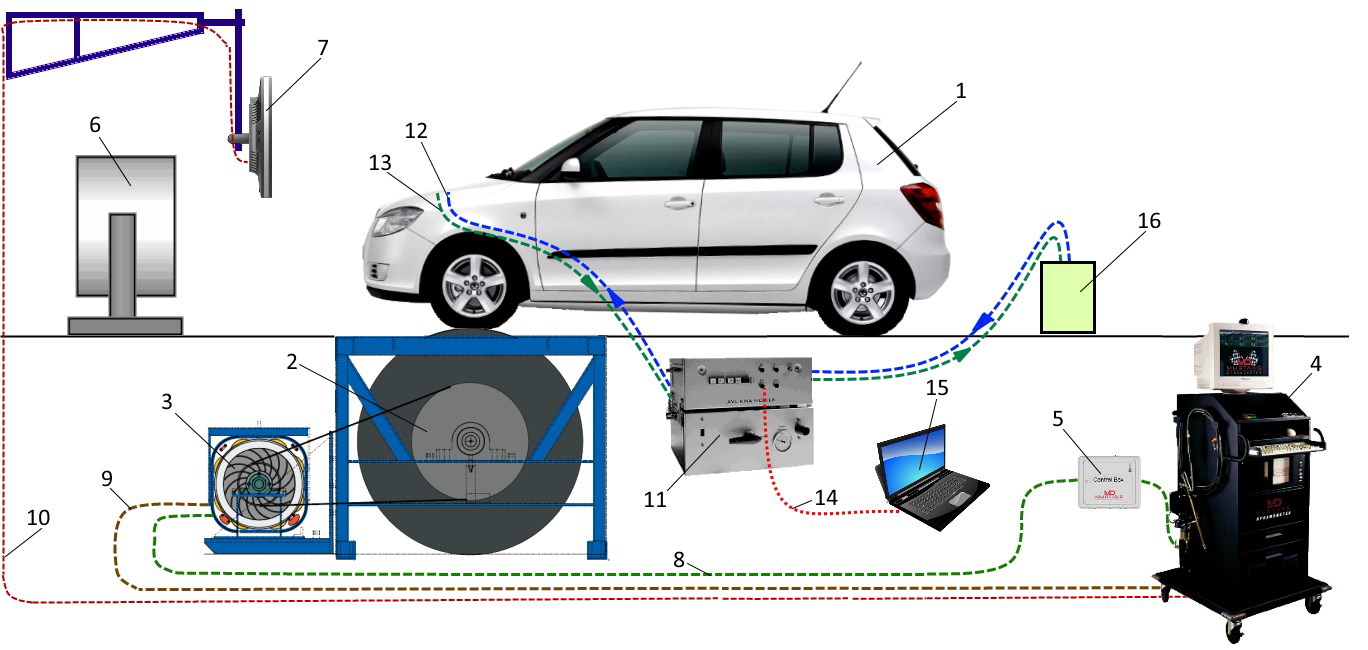
1. att. **Degvielas patēriņa mērīšanas shēma**

1 – eksperimentu automobilis; 2 – jaudas stenda veltņi; 3 – stenda slogošanas motors; 4 – stenda vadības platforma; 5 – slogošanas motora kontrolieris; 6 – dzesēšanas ventilators; 7 – frontālais monitors; 8 – stenda slogošanas motora jaudas elektroķēde; 9 – stenda slogošanas motora vadības ķēde; 10 – frontālā monitora vadības kabelis; 11 – degvielas patēriņa mēriekārta; 12 – degvielas pievadmaģistrāle; 13 – degvielas atplūdes maģistrāle; 14 – degvielas patēriņa mēriekārtas komunikācijas kabelis; 15 – degvielas patēriņa reģistrēšanas dators; 16 – ārējais degvielas rezervuārs.

Katrā izmēģinājuma atkārtojumā dati reģistrēti teksta failā, ar intervālu 1 sekunde. Kopā testēti 7 degvielas veidi. Ar katru degvielas veidu veidi 4-8 izmēģinājumu atkārtojumi.

Failu nosaukumu atšifŗējums: **1_90_1.txt** (1 – degvielas veids, 90 - braukšanas ātrums, 1- izmēģinājuma atkārtojuma numurs. 

Izmēģinājuma atkārtojuma ilgums apmēram 100 sekundes. Tā iegūtas apmēram 100 skaitļu rindiņas.

Datu faila piemērs:

.........

SystemTime[SystemTime],Vol. inst. value[Y_y_tempCompVolFlow],Vol. integrated value[Y_y_VolFlowSum],Vol. average integrated value[P_x_CALCVolFlowSumMean],Vol. integration time[Y_y_VolFlowTimeSum]

01:53:36 PM,**6.7330**,0.0000,0.5195,0.0

01:53:37 PM,6.6984,0.0019,0.0000,1.0

01:53:38 PM,6.6989,0.0019,6.8400,1.0

...........

Kolonnas atdalītas ar komatu.

Pirmajā rindā ir kolonnu nosaukumi.

Degvielas patēriņa dati ir otrajā kolonnā (Vol. inst. value[Y_y_tempCompVolFlow])

Šie dati ir jāimportē tālakajai apstrādei.

Sākumā importē dažas funkciju bibliotēkas

In [106]:
import numpy as np #matemātiskās funkcijas un darbs ar masīviem
import scipy.stats as st #matemātiskās un statistikas funkcijas
import matplotlib.pyplot as plt #diagrammas un grafiki
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

Ielādē datu failu, lietojot *numpy* funkciju *loadtext*.

Pirms tam izveido mainīgo ar nosaukumu *file* un tajā ieraksta informāciju par datnes nosaukumu. Ar '' iezīmē teksta (*string*) sākumu un beigas.

Funkcijas argumentos norāda maingo ar datnes nosaukumu, datu tipu (float - decimālskaitlis), atdalītāju (komats), rindas, kuras izlaist, kā arī vajadzīgo kolonnas numuru.

Rindas numurēšana sākas ar 1, savukārt kolonnas - ar 0.

In [107]:
file='1_90_1.txt'
D1_1 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

Ar *Python* komandu *print* var izvadīt jaunizveidotā mainīgā datus uz ekrāna. 

Mainīgā apzīmējums ir D1_1, bet tā saturs - vesela skaitļu kolonna (vektors).

In [108]:
print (D1_1) #izvada datus uz ekrāna

[6.733  6.6984 6.6989 6.7233 6.7224 6.7063 6.7157 6.7058 6.6959 6.7643
 6.7775 6.7867 6.6973 6.7839 6.6446 6.7064 6.6961 6.7024 6.7127 6.7009
 6.7728 6.7846 6.7328 6.749  6.7798 6.7148 6.7519 6.7118 6.6641 6.7074
 6.7176 6.689  6.7101 6.7297 6.6698 6.7496 6.7152 6.6768 6.7274 6.6766
 6.7173 6.6832 6.7066 6.6761 6.6804 6.6923 6.712  6.7027 6.7009 6.6652
 6.6859 6.6999 6.705  6.6719 6.7012 6.6888 6.6927 6.6964 6.6804 6.6297
 6.5838 6.5759 6.6184 6.561  6.5225 6.5544 6.5289 6.4964 6.5016 6.4862
 6.4873 6.5206 6.5073 6.477  6.5104 6.4943 6.4883 6.5029 6.4875 6.4913
 6.4957 6.6529 6.7171 5.585  6.0854 6.3599 6.3067 6.3974 6.355  6.2729
 6.3154 6.3469 6.5525 7.2012 6.9051 6.9123 6.8059 6.8566 6.8241 6.8582
 6.824  6.8087 6.8169 6.8233 6.0384 6.109  6.2257 6.2306 6.2112 6.2084
 6.2392 6.2007 6.2109 6.2358 6.2115 6.3698 6.3246 6.2948 6.3253 6.3232
 6.3237 6.3151 6.3376 6.3437 6.3687 6.3527 6.367  6.3944 6.3637 6.3685
 6.362  6.3899 6.3615 6.2936 6.3375 6.333  6.4845 6.728  6.6959 6.7161
 6.689

Ir iespējams arī attēlot mainīgā D1_1 datus grafiski. 

To var paveikt, izmantojot iepriekšielādētās bibliotēkas *matplotlib.pyplot* (izsaucamas ar saīsinājumu plt) funkciju *plot*.

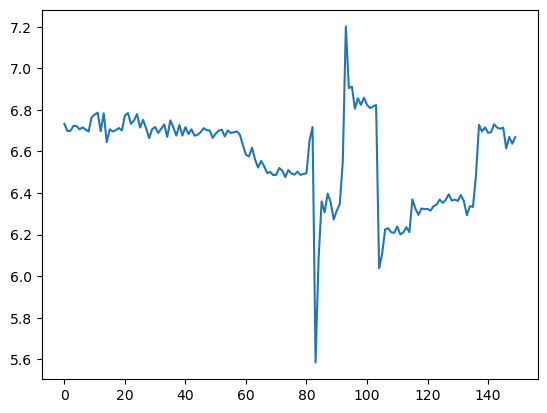

In [109]:
plt.plot(D1_1)

Grafikā redzama neliela datu izkliede ap 80 - 100 sekundi, bet to var uzskatīt par eksperimentāla izmēģinājuma brauciena efektu.

Līdzīgi, kā ar pirmo datni, var ielādēt datus un izveidot mainīgos visiem ar pirmo degvielas veidu veiktajiem izmēģinājuma braucieniem.

In [110]:
file='1_90_1.txt'
D1_1 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='1_90_2.txt'
D1_2 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='1_90_3.txt'
D1_3 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='1_90_4.txt'
D1_4 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='1_90_5.txt'
D1_5 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='1_90_6.txt'
D1_6 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='1_90_7.txt'
D1_7 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='1_90_8.txt'
D1_8 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

Mainīgie D1_1, D1_2 utt. ir skaitļu kolonnas (tos var dēvēt vienas dimensijas masīviem jeb vektoriem)

Katru no tiem var apskatīt kā grafiku, lai vizuāli novērtētu, vai nav acīmredzema datu brāķa.

([<matplotlib.lines.Line2D at 0x24eb3af8df0>],
 [<matplotlib.lines.Line2D at 0x24eb3af8940>])

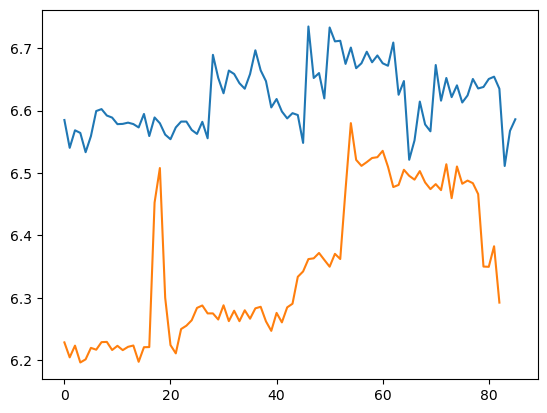

In [111]:
plt.plot(D1_3), plt.plot(D1_4)

Katrā izmēģinājuma atkārtojumā jāiegūst vidējā degvielas patēriņa vērtība. 

To var paveikt ar *numpy* funkciju *mean*, izveidojot jaunus mainīgos, piemēram **D1_1_vol_m**.

Katrs šis mainīgais ir viens decimālskaitlis, kas parāda vidējo vērtību vienā izmēģinājumā.

In [112]:
D1_1_vol_m=np.mean(D1_1)
D1_2_vol_m=np.mean(D1_2)
D1_3_vol_m=np.mean(D1_3)
D1_4_vol_m=np.mean(D1_4)
D1_5_vol_m=np.mean(D1_5)
D1_6_vol_m=np.mean(D1_6)
D1_7_vol_m=np.mean(D1_7)
D1_8_vol_m=np.mean(D1_8)

Vērtības var apskatīt, izvadot tās uz ekrāna ar komandu *print*.

In [113]:
print (D1_1_vol_m)

6.5727139999999995


Šos mainīgos var apvienot vienā mainīgajā **Vol_cons_D1**,  matricā, lietojot *python* sintaksi - kvadrātiekavas [].

Var apskatīt šīs matricas vērtības, kā arī parādīt tās grafiski.

[6.5727139999999995, 6.45979012345679, 6.618460465116279, 6.3483746987951815, 6.343533653846153, 6.520224719101123, 6.379083211678831, 6.616492156862746]


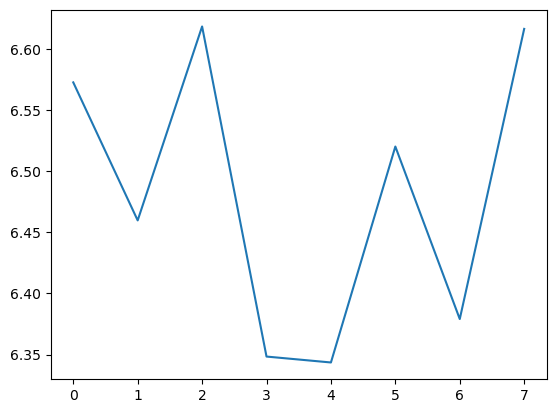

In [114]:
Vol_cons_D1=[D1_1_vol_m,D1_2_vol_m,D1_3_vol_m,D1_4_vol_m,D1_5_vol_m,D1_6_vol_m,D1_7_vol_m,D1_8_vol_m]

print (Vol_cons_D1)

plt.plot(Vol_cons_D1)

Tā no astoņām skaitļu kolonnām iegūst matricu ar astoņiem skaitļiem, kuri katrs parāda vidējo degvielas patēriņa vērtību ar viena veida degvielu, škīetami vienādos izmēģinājuma apstākļos.

Tomēr redzmas, ka vērtība katrā izmēģinājuma atkārtojumā atšķiras.

Var aprēķināt arī vidējo vērtību *izmēģinājumā*. Tas būs tikai viens skaitlis.

Ja izmēģinājumu atkārtojumu būtu vairāk, katrā būtu iespējama atšķirīga degvielas patēriņa vērtība, kā arī tad mainītos vidējā vērtība *izmēģinājumā*.

# Vidējā vērtība #

**Pētāmā parametra nezināmo īsteno vērtību raksturo mērījuma vidējais aritmētiskais**
<br>


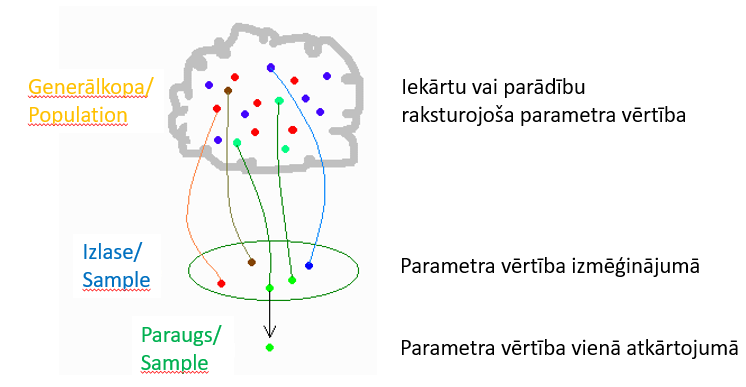

- Parādību raksturojoša parametra vērtība - īstenais, patiesais degvielas patēriņš izmēģinājuma apstākļos (šo precīzi uzzināt nekad nevarēs)

- Parametra vērtība izmēģinājumā - izmēģinājuma atkārtojumu vidējā vērtība (šo var aprēķināt, piemērā tā būs izmēģinājumu atkārtojumu mainīgā vidējā vērtība **Vol_cons_D1m** .

- Parametra vērtība vienā atkārtojumā - vidējā vērtība vienā izmēģinājuma braucienā - D1_1_vol_m, D1_2_vol_m ... utt.

$$\bar x = \frac {1}{n}  \sum_{i=1}^n x_i$$

$\qquad$ kur

$\qquad$ $n$ - atkārtojumu skaits;

$\qquad$ $x_i$ - parametra vērtība katrā atkārtojumā;

$\qquad$ $\bar x$ - vidējā vērtība izmēģinājumā.

Formulu var izteikt arī vieglāk uztevramā formātā:

$$\bar x = \frac {x_1+x_2+x_3+...+x_i}{n}$$


In [115]:
Vol_cons_D1m=np.mean(Vol_cons_D1)

print (Vol_cons_D1m)

6.482334128607138


Uzskatāmībai iespējams grafiski attēlot izmēģinājumu atkārtojuma vērtības un vidējo vērtību.

Tas paveikts, izveidojot jaunu mainīgo **Vol_cons_D1m_r**, kurā 8 reizes atkārtota izmēģinājuma vidējā vērtība, un tad veidota diagramma.

([<matplotlib.lines.Line2D at 0x24eb4cc7a90>],
 [<matplotlib.lines.Line2D at 0x24eb4cc7c70>])

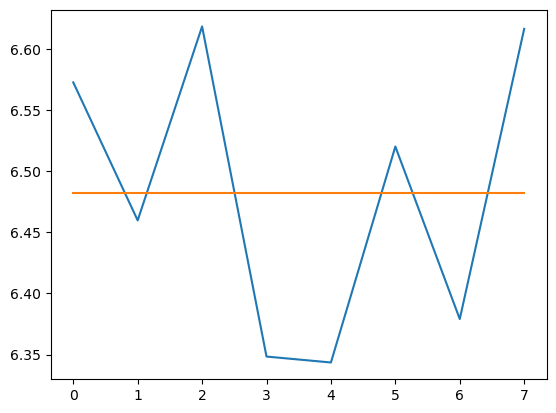

In [116]:
Vol_cons_D1m_r=[Vol_cons_D1m,Vol_cons_D1m,Vol_cons_D1m,Vol_cons_D1m,Vol_cons_D1m,Vol_cons_D1m,Vol_cons_D1m,Vol_cons_D1m]

plt.plot(Vol_cons_D1), plt.plot(Vol_cons_D1m_r)

# Kvadrātisko kļūdu summa

Kļūda (error): individuāla mērījuma novirze no izlases vidējās vērtības: 

$$ \delta=x_i-\bar x$$

$\qquad$ kur

$\qquad$ $x_i$ - parametra vērtība katrā atkārtojumā;

$\qquad$ $\bar x$ - vidējā vērtība izmēģinājumā.

Zemāk veikts *kļūdas* jeb novirzes aprēķins katram izmēģinājuma atkārtojumam:

Rezultāts apkopots mainīgajā *delta* un izvadīts uz ekrāna. 

Redzams, ka kļūdu vērtības ir gan negatīvas, gan pozitīvas.

In [117]:
delta_1=D1_1_vol_m - Vol_cons_D1m
delta_2=D1_2_vol_m - Vol_cons_D1m
delta_3=D1_3_vol_m - Vol_cons_D1m
delta_4=D1_4_vol_m - Vol_cons_D1m
delta_5=D1_5_vol_m - Vol_cons_D1m
delta_6=D1_6_vol_m - Vol_cons_D1m
delta_7=D1_7_vol_m - Vol_cons_D1m
delta_8=D1_8_vol_m - Vol_cons_D1m

delta=[delta_1,delta_2,delta_3,delta_4,delta_5,delta_6,delta_7,delta_8]
print (delta)

[0.09037987139286141, -0.02254400515034849, 0.13612633650914052, -0.13395942981195663, -0.138800474760985, 0.03789059049398524, -0.10325091692830668, 0.13415802825560785]


Kļūdas jeb novirzes var summēt, un iegūt parametru **Kļūdu summa**.

Zemāk tas paveikts ar *numpy* funkciju **sum** un rezultāts izvadīts uz ekrāna.

In [118]:
delta_summa=np.sum(delta)
print (delta_summa)

-1.7763568394002505e-15


Rezultāts ir ļoti tuvs nullei, jo novirzes ar pretējām zīmēm savstarpēji dzēšas.

Lai šo efektu izslēgtu, var kāpināt kļūdas kvadrātā, iegūstot *kvadrātisko kļūdu* (Squared Error).
# Kvadrātisko kļūdu summa

Kvadrātisko kļūdu summa (*Sum of Squared Error (SSE)*) = novirzes kāpinātas kvadrātā un summētas.


$$SSE =  \sum_{i=1}^n (x_i-\bar x)^2$$

$\qquad$ kur

$\qquad$ $n$ - atkārtojumu skaits;

$\qquad$ $x_i$ - parametra vērtība katrā atkārtojumā;

$\qquad$ $\bar x$ - vidējā vērtība izmēģinājumā.


Tas ir paveikts sekojošā koda fragmentā:

In [119]:
SSE=np.sum([delta_1**2,delta_2**2,delta_3**2,delta_4**2,delta_5**2,delta_6**2,delta_7**2,delta_8**2])
print (SSE)

0.0945126586819797


**SSE** raksturo individuālā atkārtojuma parametra vērtības atšķirību no izmēģinājuma vidējās vērtības.

Vērtība pieaug līdz ar mērījumu skaitu – nav ērti lietojams parametrs.


# Vidējā kvadrātisko kļūdu summa #

Vidējā kvadrātisko kļūdu summu jeb *Mean Squared Error (MSE)* var aprēķināt dalot kvadrātisko kļūdu summu (SSE) ar brīvības pakāpju (*df*) skaitu.

Savukārt brīvības pakāpju skaits ir ***izlases*** apjoms *n - 1.* 

Kādēļ tā? To varētu paskaidrot šādi:

Jums 7 dažādas cepures, katrai nedēļas dienai sava.

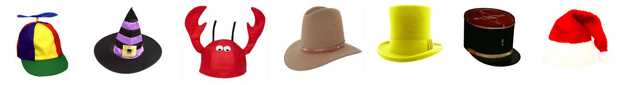!

Pirmdien Jūs variet izvēlēties jebkuru no 7 cepurēm. Otrdien variet izvēlēties jebkuru no 6 atlikušajām cepurēm, trešdien variet izvēlēties jebkuru no 5 cepurēm, utt.

Kad pienāk sestdiena, jums joprojām ir izvēle starp 2 cepurēm, kuras tajā nedēļā vēl neesat valkājis. Bet pēc tam, kad izvēlēta cepuri sestdienai, jums vairs nav izvēles cepurei, kuru likt galvā svētdien. Jums atlikusi tikai viena cepure, kas vēl nav lietota. Jums bija 7-1 = 6 “cepures” brīva izvēle, izvēloties atšķirīgu cepuri katrai nedēļas dienai.

Tā ir ideja, kas slēpjas aiz brīvības pakāpes statistikā. Brīvības pakāpes var būt definētas kā “novērojumu” (informācijas daļu) skaits datos, kas var brīvi atšķirties, novērtējot statistikas parametrus.

[https://blog.minitab.com/en/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics]


$$MSE = \frac {1}{n-1}  \sum_{i=1}^n (x_i-\bar x)^2$$

$$MSE = \frac {SSE} {n-1}$$

Aprēkina piemērs:

Izlases apmēru var noteikt ar *numpy* funkcju *size*.


In [120]:
MSE=SSE/(np.size(Vol_cons_D1)-1)
print (MSE)

0.013501808383139956


Ja atkārtojumu vidējā vērtība raksturo izmēģinājumā iegūtā parametra vērtību, *MSE* raksturo, kā šī vidējā vērtība varētu atbilst parametra patiesajai vērtībai.

Jo MSE tuvāk 0, jo vidējai vērtībai augstāka iespējamā atbilstība.

MSE apzīmē ar kā izkliedi jeb *dispersiju* (Variance)

MSE vērtība nepieaug, pieaugot izlases lielumam.

Vērtība gan ir kāpināta kvadrātā… bet to var labot.


# Standartnovirze (Standard Deviation)

$$ SD=\sqrt {MSE} $$

Standartnovirze raksturo, cik labi konkrētās izlases vidējā vērtība reprezentē datus.

Mērvienība ir tāda pati, kā mērāmajam parametram. Bieži vien SD apzīmē ar grieķu burtu sigma $\sigma$.

Standartnovirzi var lietot, lai raksturotu datu variāciju attiecībā uz izlases vidējo vērtību.

Jo lielāka standartnovirzes vērtība, jo lielāka rezultātu izkliede ap vidējo vērtību.

Standartnovirzi  var aprēķināt ar paša veidotu formulu, vai arī izmantojot iebūvētu funkciju.

Iebūvētā funkcija *numpy* bibliotēkā ir *std*, un to lietojot jānorāda, ka par vienu brīvības pakāpe jāaprēķina, atņemot 1 no izlases apjoma (*ddof=1*).

Zemāk esošajā šūnā tas is paveikts ar abiem paņēmieniem, un rezultāti izvadīti uz ekrāna.


In [121]:
SD1=(MSE)**(1/2)

SD2=np.std( Vol_cons_D1, ddof=1)

print (SD1, SD2)

0.11619728216761335 0.11619728216761335


# Ticamības intervāls

*Standartnovirze* sniedz informāciju par datu vai novērojumu precizitāti. Tāpēc kopā ar parametru vērtībām būtu jānorāda arī standartnovirze.

Ērts un informatīvs veids, kā informēt par novērojumu precizitāti, ir izmantot ***ticamības intervālus***.

Ticamības intervāli ir nosacītas robežas, kas izvietotas ap parametru vērtībām. Ticamības intervāla garums nodrošina tiešu novērtējuma precizitātes mērījumu: jo īsāks ticamības intervāls, jo precīzāks novērtējums.

Ticamības intervāli ļauj arī būt patiesākiem vai tiešākiem attiecībā uz interesējošā parametra ticamām vērtībām, nevis tikai ziņot par vienu vērtību.

Ticamības intervālus nosaka ar noteiktu varbūtību, kuru var iepriekš izvēlēties.

*Varbūtība* ir skaitlis starp nulli un viens, kas izsaka, kāda ir iespējamība, ka notiks notikums, darbība vai atbilde. Varbūtība, kas ir tuvu vienam, norāda, ka ir ļoti iespējams, ka notiks notikums, bet varbūtība, kas ir tuvu nullei, norāda, ka notikums ir maz ticams. Varbūtība dažreiz tiek izteikta kā procenti.

Veidojot ticamības intervālu, parāda, ka ar zināmu varbūtību parametra vērtība varētu atrasties ticamības intervāla robežās.

Inženierzinātnēs mēdz lietot varbūtības vērtības 95%, 99% vai pat 99.9%.

Dažkārt varbūtības vietā lieto *nozīmīgumu*, ko mēdz apzīmēt ar $\alpha$. Sakarība starp varbūtību un nozīmīgumu:

$$ \alpha=1-\frac{P}{100} $$

$\qquad$ kur

$\qquad$ P - varbūtība, %.



In [122]:
P=95 #varbūtība, %
alpha=1-P/100 #nozīmīgums

print (np.round((alpha),2))

0.05


Izlases gadījumā var interesēt, kā ar atsevišķas izlasi veidojošās vērtības (izmēģinājuma atkārtojumi) izkliedējas ap vidējo vērtību.

Ja izlase ir pietiemai liela - vismaz vairāki desmiti paraugu - tad tādu novērtējumu var veikt, izveidojot *histogrammu*.

Piemērā lietotā izlase sastāv no 8 atkārtojumiem, un sadalījums, cik reizes atkārtojas vērtības noteiktās robežās, izskatās neparasti.

Zemāk redzamas uz ekrāna izvadītas izlases vērtības un to histogramma (ar funkciju *hist*), kurā sadalījums veikts 4 kategorijās (*bins*)

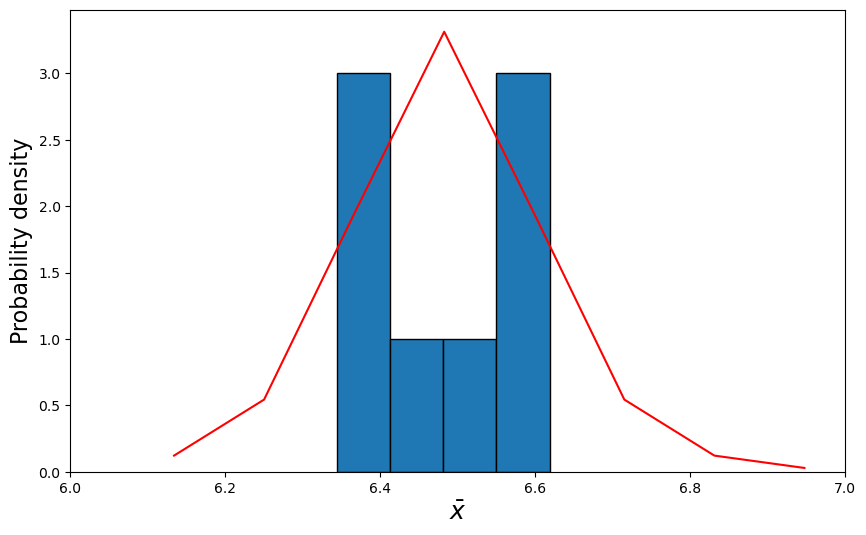

In [123]:
from scipy.stats import expon 
from scipy.stats import t

#np.random.seed(1)
n= 8#50
mu = np.mean (Vol_cons_D1)
sigma = SD1#1

t_score=[mu-sigma*3,mu-sigma*2,mu-sigma*1,mu, mu+sigma*1,mu+sigma*2,mu+sigma*3,mu+sigma*4]

#xbar = [expon.rvs(size=n).mean() for i in range(10000)]

#ss=np.arange(0, 2, 0.01)
x = np.sort(Vol_cons_D1) #np.arange(0, 2, 0.01)
#y = t.pdf(x, loc=mu, scale=sigma/n**0.5 , df=7)
y = t.pdf(t_score, loc=mu, scale=sigma , df=7)
#y = t.pdf(x, loc=mu, scale=1 sigma / n**0.5, df=7)

plt.figure(figsize=(10, 6))
plt.hist(x, density=False, bins = 4, edgecolor='black', linewidth=1)
plt.plot(t_score, y, color = 'red',
         label="T distribution \n $\mu={}, \sigma={}$".\
         format(np.round(mu,2), np.round(sigma,2)))

plt.xlim([6, 7])
#plt.ylim([0, 6])
plt.xlabel(r'$\bar{x}$', fontsize=18)
plt.ylabel('Probability density', fontsize=16)
plt.show()

Tālāk ievietots kods, ar kuru tiek ģenerēta gadījuma skaitļu izlase, un iegūta histogramma un normālā sadalījuma  blīvuma diagramma.

Tas salīdzinājumam, kā varētu izskatīties lielākas izlases dati.

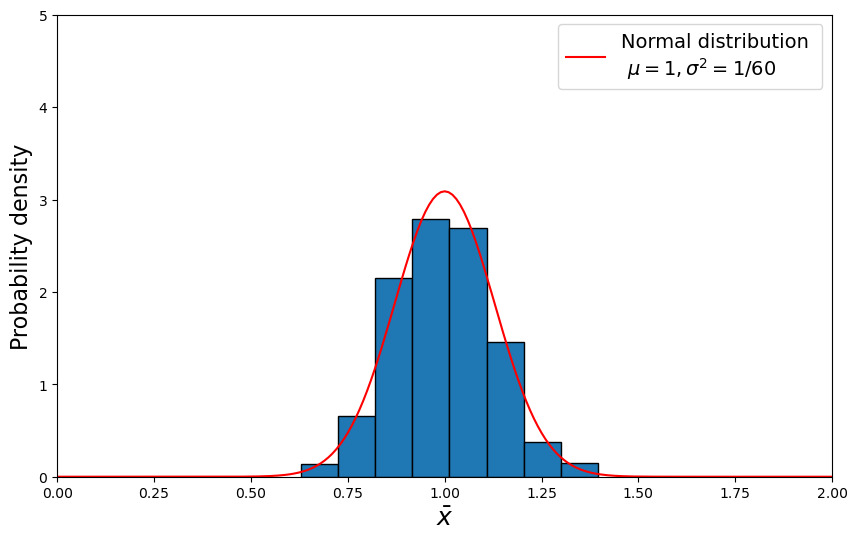

In [124]:
from scipy.stats import expon 
from scipy.stats import t
np.random.seed(1)
n= 60
mu = 1
sigma = 1

xbar = [expon.rvs(size=n).mean() for i in range(1000)]

x = np.arange(0, 6, 0.01)
y = t.pdf(x, loc=mu, scale= sigma / n**0.5, df=np.size(x)-1)

plt.figure(figsize=(10, 6))
plt.hist(xbar, density=True, bins = 8, edgecolor='black', linewidth=1)
plt.plot(x, y, color = 'red',
         label='Normal distribution \n $\mu={}, \sigma^2=1/{}$'.\
         format(mu, n))

plt.legend(loc='best', fontsize=14)
plt.xlim([0, 2])
plt.ylim([0, 5])
plt.xlabel(r'$\bar{x}$', fontsize=18)
plt.ylabel('Probability density', fontsize=16)
plt.show()

Nozīmīgums un arī varbūtība var tika noteikta vienpusēji vai divpusēji. 

Ar to domāts, vai apstrādājot datus, interesē, vai izlases sadalījums ir lielāks un mazāks par vidējo vērtību (divpusējs), vai tikai lielāks vai mazāks (vienpusējs).

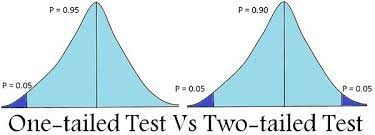

Stūdenta (t) sadalījuma ticamības intervāla relaitīvais platums ir noskaidrojams, lietojot tabulas, vai aprēķinot ar kādu piemērotu funkciju.

Zemāk aplūkojama tabula.

Tajā iekļautie dati ļauj spriest, cik standartnovirzes no vidējās vērtības varētu atrasties izlases vidējās vērtības patiesā vērtība.

Protams, to var mēģināt prognozēt tika ar zināmu varbūtību.

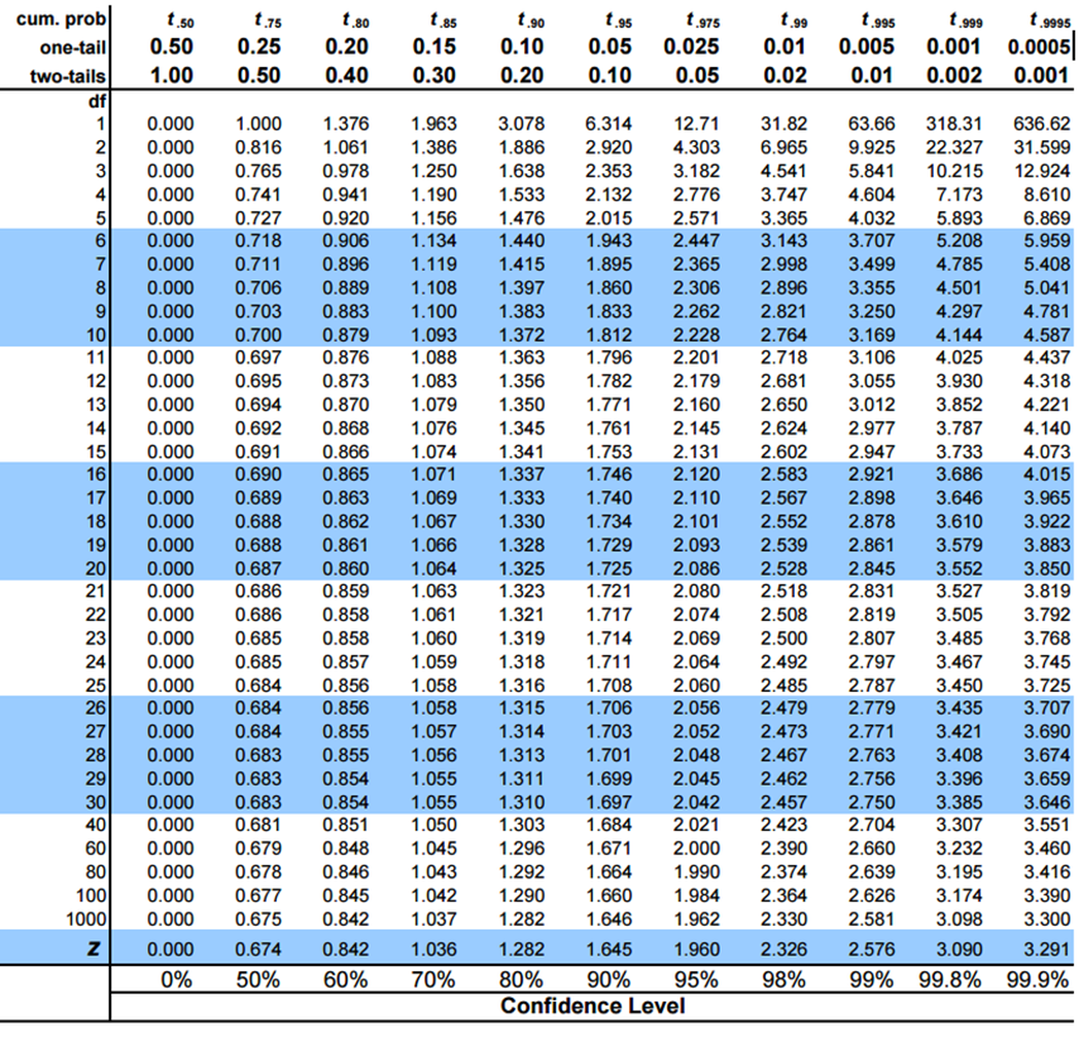

Viens veids, kā iegūt Stūdenta (t) sadalījuma ticamības intervāla relaitīvais platuma vērtības, ir zemāk esošais kods:

Tajā ielādē funkciju no *scipy* bibliotēkas, tad kā argumentus norāda izlases brīvības pakāpju skaitu (izlases apjoms mīnus viens), un vienpusēji noteiktu nozīmīgumu.

Ja varbūtība P=90%, $ \alpha $=0.05, ja P=95%, $\alpha$=0.025 un tamlīdzīgi.

Iegūto vērtību var salīdzināt ar iepriekš parādīto tabulu.

In [125]:
from scipy.special import stdtrit

df=np.size(Vol_cons_D1)-1  #brīvības pakāpju skaits

alpha = 0.025 # one sided. Prob=(1-alpha*2)*100 

t=stdtrit(df, 1 - alpha)

print (t)

2.3646242510102993


***Ticamības intervālu*** var aprēķināt sekojoši:

$$ CI = \frac{t \cdot SD}{\sqrt{n}} $$

$\qquad$ kur

$\qquad$ t - Stūdenta (t) sadalījuma ticamības intervāla relaitīvais platums;

$\qquad$ SD - standartnovirze;

$\qquad$ n - izlases apjoms.

Aprēķins veikts nākamajā koda fragmetnā.

In [126]:
n=np.size(Vol_cons_D1)

CI=(t*SD1)/(n)**0.5

print (CI)

0.0971433589047061


Rezultātu var prezentēt kā skaitli, kā arī veidot diagrammas.

(0.0, 8.0)

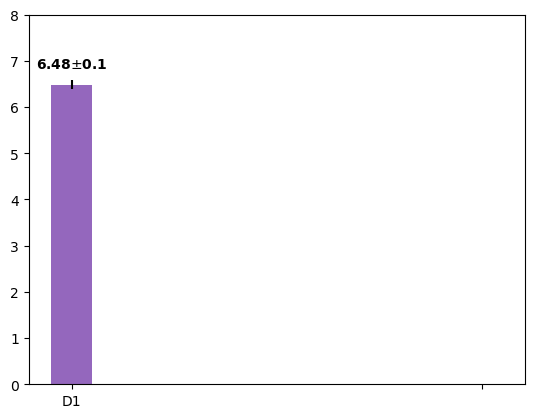

In [127]:
labels = ['D1', ' ']

bar1=plt.bar( labels [0], np.round(Vol_cons_D1m,2) , width =0.1, yerr=CI , color = 'C4')

plt.bar( labels [1], np.round(Vol_cons_D1m,2) , width =0.1 , color = 'white')

def autolabel1(rects):
    """Attach a text label above each bar , displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}$\pm${}'.format(height,  np.round(CI,2)), # format(height,'.2f'),format(CI,'.2f')
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', 
      weight='bold')
        
autolabel1 (bar1)
        
ylim=8  #set axis limits  

plt.ylim(0,ylim)

Turpinājumā visu datu apstrāde

Sākumā, atkārtojot, pirmā degvielas veida datu apstrāde.

In [128]:
Vol_cons_D1=[D1_1_vol_m,D1_2_vol_m,D1_3_vol_m,D1_4_vol_m,D1_5_vol_m,D1_6_vol_m,D1_7_vol_m,D1_8_vol_m]

s_size=np.size(Vol_cons_D1) #izlases izmērs
df=s_size-1 #brīvības pakāpju skaits

from scipy.special import stdtrit

alpha = 0.025 # one sided. Prob=1-alpha*2

t=stdtrit(df, 1 - alpha)


SD=st.tstd(Vol_cons_D1)
Vol_cons_D1m=np.mean(Vol_cons_D1)

CI_vol_D1=(t*SD)/(s_size**0.5)

Otrā degvielas veida datu apstrāde

In [129]:
file='2_90_1.txt'
D2_1 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='2_90_2.txt'
D2_2 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='2_90_3.txt'
D2_3 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='2_90_4.txt'
D2_4 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)


D2_1_vol_m=np.mean(D2_1)
D2_2_vol_m=np.mean(D2_2)
D2_3_vol_m=np.mean(D2_3)
D2_4_vol_m=np.mean(D2_4)


#create 95% confidence interval for population mean weight

Vol_cons_D2=[D2_2_vol_m,D2_3_vol_m,D2_4_vol_m]

s_size=np.size(Vol_cons_D2)
df=s_size-1

from scipy.special import stdtrit

alpha = 0.025 # one sided. Prob=1-alpha*2

t=stdtrit(df, 1 - alpha)


SD=st.tstd(Vol_cons_D2)
Vol_cons_D2m=np.mean(Vol_cons_D2)

CI_vol_D2=(t*SD)/(s_size**0.5)

Trešā degvielas veida datu apstrāde

In [130]:
file='3_90_1.txt'
D3_1 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='3_90_2.txt'
D3_2 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='3_90_3.txt'
D3_3 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='3_90_4.txt'
D3_4 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)


D3_1_vol_m=np.mean(D3_1)
D3_2_vol_m=np.mean(D3_2)
D3_3_vol_m=np.mean(D3_3)
D3_4_vol_m=np.mean(D3_4)


#create 95% confidence interval for population mean weight

Vol_cons_D3=[D3_2_vol_m,D3_3_vol_m,D3_4_vol_m]

s_size=np.size(Vol_cons_D3)
df=s_size-1

from scipy.special import stdtrit

alpha = 0.025 # one sided. Prob=1-alpha*2

t=stdtrit(df, 1 - alpha)


SD=st.tstd(Vol_cons_D3)
Vol_cons_D3m=np.mean(Vol_cons_D3)

CI_vol_D3=(t*SD)/(s_size**0.5)

Ceturtā degvielas veida datu apstrāde

In [131]:
file='4_90_1.txt'
D4_1 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='4_90_2.txt'
D4_2 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='4_90_3.txt'
D4_3 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)

file='4_90_4.txt'
D4_4 = np.loadtxt(file, dtype=float, delimiter=',', skiprows=1, usecols=1)


D4_1_vol_m=np.mean(D4_1)
D4_2_vol_m=np.mean(D4_2)
D4_3_vol_m=np.mean(D4_3)
D4_4_vol_m=np.mean(D4_4)


#create 95% confidence interval for population mean weight

Vol_cons_D4=[D4_2_vol_m,D4_3_vol_m,D4_4_vol_m]

s_size=np.size(Vol_cons_D4)
df=s_size-1

from scipy.special import stdtrit

alpha = 0.025 # one sided. Prob=1-alpha*2

t=stdtrit(df, 1 - alpha)


SD=st.tstd(Vol_cons_D4)
Vol_cons_D4m=np.mean(Vol_cons_D4)

CI_vol_D4=(t*SD)/(s_size**0.5)

labels = ['D1', 'D2', 'D3', 'D4']

Diagrammas veidošana

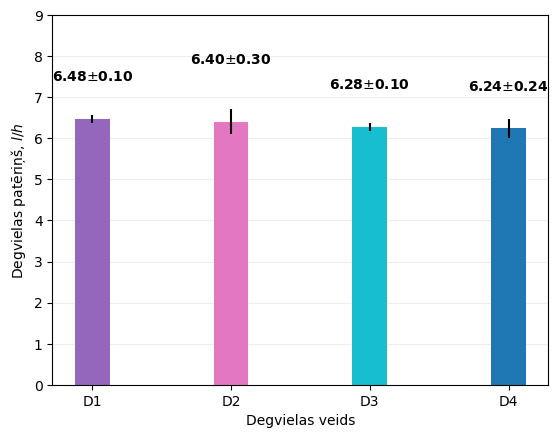

0.10


In [138]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x[0] , np.round(Vol_cons_D1m,2) , width, yerr=CI_vol_D1 , color = 'C4')
bars2 = ax.bar(x[1], np.round(Vol_cons_D2m,2), width, yerr=CI_vol_D2, color = 'C6')
bars3 = ax.bar(x[2] , np.round(Vol_cons_D3m,2), width, yerr=CI_vol_D3, color = 'C9')
bars4 = ax.bar(x[3] , np.round(Vol_cons_D4m,2), width, yerr=CI_vol_D4, color = 'C10')



ax.set_xticks(x)
ax.set_xticklabels(labels)



def autolabel1(rects):
    """Attach a text label above each bar , displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}$\pm${}'.format(format(height,'.2f'),  format(CI_vol_D1,'.2f')),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 25),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', 
      weight='bold')
        
def autolabel2(rects):
    """Attach a text label above each bar , displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}$\pm${}'.format(format(height,'.2f'),  format(CI_vol_D2,'.2f')),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 40),  
                    textcoords="offset points",
                    ha='center', va='bottom', 
      weight='bold') 
        
def autolabel3(rects):
    """Attach a text label above each bar , displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}$\pm${}'.format(format(height,'.2f'),  format(CI_vol_D3,'.2f')),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 25),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', 
      weight='bold')
        
def autolabel4(rects):
    """Attach a text label above each bar , displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}$\pm${}'.format(format(height,'.2f'),  format(CI_vol_D4,'.2f')),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 25),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', 
      weight='bold')
        
        
       
      

ylim=9  #set axis limits
ax.set_ylim(0,ylim)


ax.yaxis.set_major_locator(MultipleLocator(1)) # distribute major ticks on y axis

autolabel1(bars1)
autolabel2(bars2)
autolabel3(bars3)
autolabel4(bars4)


ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

#ax.grid() #create grid
ax.set_ylabel('Degvielas patēriņš, $l/h$')
ax.set_xlabel('Degvielas veids')



plt.show()

print(format(CI_vol_D3,'.2f'))
